In [14]:
# Dependencies
import pandas as pd
import csv
import requests
import json
import matplotlib.pyplot as plt

In [15]:
with open("stadiums_nfl.json") as datafile:
  data = json.load(datafile)
dataframe = pd.DataFrame(data)

In [16]:
dataframe.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-87.61676997...",2017-04-13T04:48:16-04:00,acaab7736b25dbc81055f02ceb96041ea791aab6
1,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-95.41091997...",2017-04-13T04:48:16-04:00,b6b73850e7110b440b11ba18a3d5d18c4a4df399
2,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-94.48388009...",2017-04-13T04:48:16-04:00,dae0180f6c4107dbc52ea4174d0e331e135d8e74
3,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-90.08127999...",2017-04-13T04:48:16-04:00,bb9e7a8c6e5b57f863029203999e7fe3877b50ed
4,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-80.23888995...",2017-04-13T04:48:16-04:00,2c453332d4240ec71639594550cd223109270786


In [17]:
# Store filepath in a variable
file_one = "stadiums_nfl.csv"
file_two = "nfl_data.csv"

In [18]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
stadiums_nfl_df = pd.read_csv(file_one, encoding="ISO-8859-1")
stadiums_score_df = pd.read_csv(file_two)

In [19]:
# Show just the header
stadiums_nfl_df.head()

,CITY,STATE,NAME,TEAM,ROOF_TYPE,CONFERENCE,DIVISION,CAPACITY,LATITUDE,LONGITUDE,COLOR 1,COLOR 2
0,Arlington,TX,Cowboys Stadium,Dallas Cowboys,Retractable,National,East,80000.0,32.74778,-97.09277,ROYAL BLUE,NaN
1,Atlanta,GA,Georgia Dome,Atlanta Falcons,Dome,National,South,71228.0,33.75735,-84.40121,NaN,NaN
2,Baltimore,MD,M&T Bank Stadium,Baltimore Ravens,Open,American,North,71008.0,39.27790,-76.62270,NaN,NaN
3,Charlotte,NC,Bank of America Stadium,Carolina Panthers,Open,National,South,73778.0,35.22584,-80.85331,NaN,NaN
4,Chicago,IL,Soldier Field,Chicago Bears,Open,National,North,61500.0,41.86250,-87.61677,NaN,NaN


In [20]:
stadiums_score_df.head()

,Unnamed: 0,schedule_date,schedule_season,team_home,score_home,score_away,stadium,win/loss
0,11076,09/04/2014,2014,Seattle Seahawks,36.0,16.0,CenturyLink Field,W
1,11077,09/07/2014,2014,Atlanta Falcons,37.0,34.0,Georgia Dome,W
2,11078,09/07/2014,2014,Baltimore Ravens,16.0,23.0,M&T Bank Stadium,L
3,11079,09/07/2014,2014,Chicago Bears,20.0,23.0,Soldier Field,L
4,11080,09/07/2014,2014,Dallas Cowboys,17.0,28.0,Cowboys Stadium,L


In [21]:
# Export file as a CSV, without the Pandas index, but with the header
#stadiums_nfl_df_type.to_csv("stadiums_nfl_type.csv", index=False, header=True)

In [22]:
# Export file as a CSV, without the Pandas index, but with the header
#merge_stadiums_df.to_csv("stadiums_nfl_merge.csv", index=False, header=True)

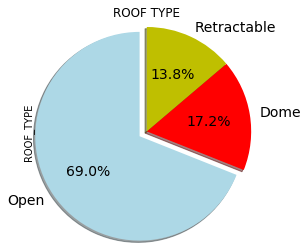

In [23]:
stadiums_nfl_df.ROOF_TYPE.value_counts().plot(kind='pie',explode=[0.1, 0, 0],autopct='%1.1f%%',radius=1.2, startangle=90,
                                              colors=['LightBlue','R','Y'],shadow=True, fontsize=14)

plt.title('ROOF TYPE')

plt.show()

In [24]:
#R= {'schedule_season':'Schedule_Season','win/loss':'Win/Loss'}
Total_Win_Loss= stadiums_score_df.groupby(['schedule_season','win/loss']).size().reset_index()#.rename(columns=R)
Total_Win_Loss

,schedule_season,win/loss,0
0,2014,L,111
1,2014,W,145
2,2015,L,118
3,2015,W,138
4,2016,L,109
5,2016,W,147
6,2017,L,111
7,2017,W,145


In [13]:
Total_Stadium_Type= stadiums_nfl_df.groupby(['CITY','ROOF_TYPE','NAME',]).size().reset_index()
Total_Stadium_Type

,CITY,ROOF_TYPE,NAME,0
0,Arlington,Retractable,Cowboys Stadium,1
1,Atlanta,Dome,Georgia Dome,1
2,Baltimore,Open,M&T Bank Stadium,1
3,Charlotte,Open,Bank of America Stadium,1
4,Chicago,Open,Soldier Field,1
5,Cincinnati,Open,Paul Brown Stadium,1
6,Cleveland,Open,Cleveland Browns Stadium,1
7,Denver,Open,Invesco Field at Mile High,1
8,Detroit,Dome,Ford Field,1
9,East Rutherford,Open,Meadowlands Stadium,1
